A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier

In [45]:
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")
df.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


<AxesSubplot:>

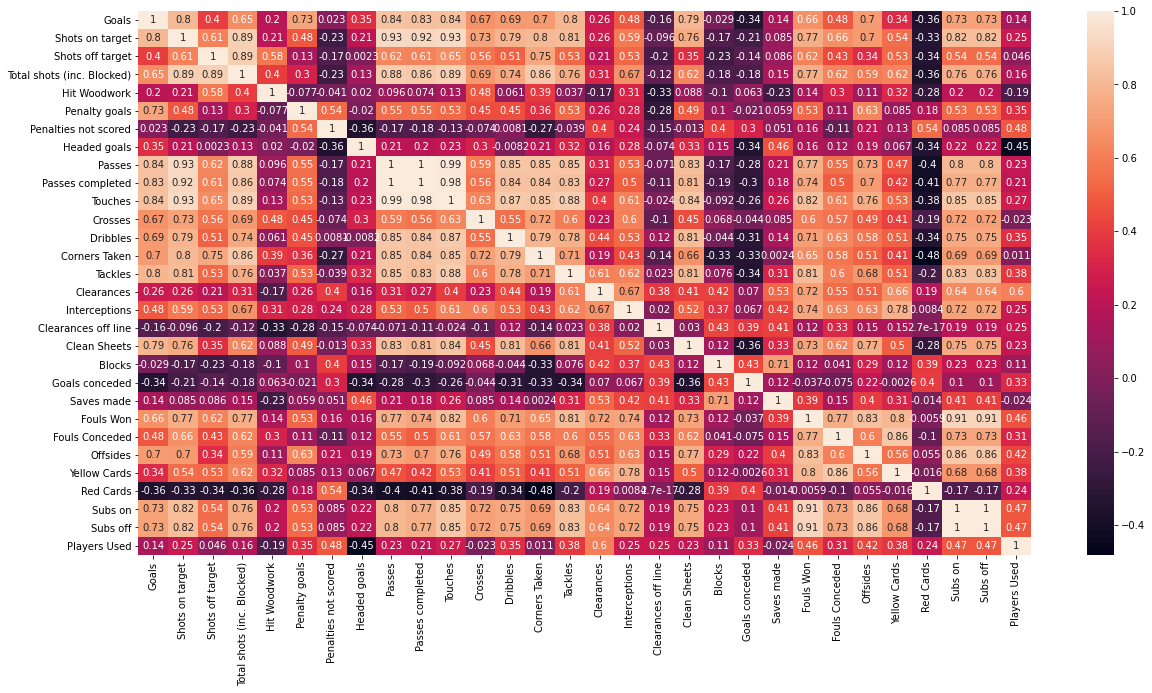

In [46]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(ax=ax, data=df.corr(), annot=True)
# Matriz de correlación

In [47]:
correlacion_df = df.corr().abs()
correlacion_valores = correlacion_df.unstack().sort_values()
correlacion_valores = correlacion_valores[~(correlacion_valores == 1)] # Filtramos las diagonales
correlacion_valores.tail(10)
# Vemos las columnas mas correlacionadas

Passes            Shots on target     0.930337
Shots on target   Passes              0.930337
Touches           Shots on target     0.934623
Shots on target   Touches             0.934623
Touches           Passes completed    0.984324
Passes completed  Touches             0.984324
Passes            Touches             0.993044
Touches           Passes              0.993044
Passes            Passes completed    0.997697
Passes completed  Passes              0.997697
dtype: float64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

Vamos a ver si existe algún tipo de relación entre la precisión de disparos a puerta con respecto a los goles

In [49]:
df['Shooting Accuracy'] = df['Shooting Accuracy'].apply(lambda x: float(x[:-1]))
# Covertimos la columna 'Shooting Accuracy' a numérica

Text(0, 0.5, 'Goles')

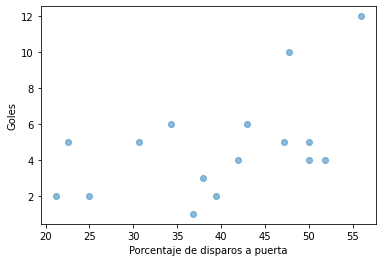

In [50]:
fig, ax = plt.subplots()
ax.scatter(x=df['Shooting Accuracy'], y=df['Goals'], alpha=0.5)
ax.set_xlabel('Porcentaje de disparos a puerta')
ax.set_ylabel('Goles')
# Distribución de los datos

In [51]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(df['Shooting Accuracy'], df['Goals'], test_size=0.2, random_state=seed)

Vamos a entrenar los modelos

Linear Regression

In [52]:
linear_model = LinearRegression()
linear_model.fit(X_train.values.reshape(-1, 1), y_train)
X_train_linear_show, y_train_linear_show = zip(*sorted(zip(X_train, linear_model.predict(X_train.values.reshape(-1, 1))))) 
X_linear_show, y_linear_show = zip(*sorted(zip(X_test, linear_model.predict(X_test.values.reshape(-1, 1))))) # Para mostrar
print(f'El score de {linear_model.__class__.__name__} es {linear_model.score(X_test.values.reshape(-1, 1), y_test)}')

El score de LinearRegression es -0.0019408831858691578


Polynomial Regression

In [53]:
polynomial_model = LinearRegression()
polynomial_transform = PolynomialFeatures(degree=2)
X_train_poly = polynomial_transform.fit_transform(X_train.values.reshape(-1, 1), y_train)
X_test_poly = polynomial_transform.fit_transform(X_test.values.reshape(-1, 1))
polynomial_model.fit(X_train_poly, y_train)
X_train_poly_show, y_train_poly_show = zip(*sorted(zip(X_train, polynomial_model.predict(X_train_poly)))) # Para mostrar
X_poly_show, y_poly_show = zip(*sorted(zip(X_test, polynomial_model.predict(X_test_poly)))) # Para mostrar
print(f'El score de {polynomial_model.__class__.__name__} es {polynomial_model.score(X_test_poly, y_test)}')


El score de LinearRegression es -0.22092112016336185


SVR

In [54]:
SVR_model = svm.SVR(kernel='poly', degree=2)
SVR_model.fit(X_train.values.reshape(-1, 1), y_train)
X_train_svr_show, y_train_svr_show = zip(*sorted(zip(X_train, SVR_model.predict(X_train.values.reshape(-1, 1))))) # Para mostrar
X_svr_show, y_svr_show = zip(*sorted(zip(X_test, SVR_model.predict(X_test.values.reshape(-1, 1))))) # Para mostrar
print(f'El score de {SVR_model.__class__.__name__} es {SVR_model.score(X_test.values.reshape(-1, 1), y_test)}')

El score de SVR es -0.19144904994763956


In [55]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 5), dpi=1000)
ax[0].scatter(x=X_test, y=y_test)
ax[0].plot(X_linear_show, y_linear_show, label='Regresión linear')
ax[0].plot(X_poly_show, y_poly_show, label='Regresión Polinomial')
ax[0].plot(X_svr_show, y_svr_show, label='SVR')
ax[0].set_title('Conjunto de test')
ax[0].set_xlabel('Porcentaje de disparos a puerta')
ax[0].set_ylabel('Goles')
ax[0].legend()
ax[1].scatter(x=X_train, y=y_train)
ax[1].plot(X_train_linear_show, y_train_linear_show, label='Regresión linear')
ax[1].plot(X_train_poly_show, y_train_poly_show, label='Regresión Polinomial')
ax[1].plot(X_train_svr_show, y_train_svr_show, label='SVR')
ax[1].set_title('Conjunto de entrenamiento')
ax[1].set_xlabel('Porcentaje de disparos a puerta')
ax[1].set_ylabel('Goles')
ax[1].legend()

Vamos a intentar predecir los goles que metería un equipo con las siguientes estadisticas con varios modelos

[% de goles por disparo: 40, %Total shots (inc. Blocked): 102, Corners Taken: 5, Passes: 82, Dribbles: 23]

In [56]:
predecir = np.array([40, 102, 5, 82, 23]).reshape(1, -1)

In [57]:
columnas = [f'% Goals-to-shots', 'Total shots (inc. Blocked)', 'Corners Taken', 'Passes', 'Dribbles', 'Goals']
df = df[columnas]
df[f'% Goals-to-shots'] = df[f'% Goals-to-shots'].apply(lambda x: float(x[:-1]))
df.head()
# Filtramos el dataset con las columnas necesarias


,% Goals-to-shots,Total shots (inc. Blocked),Corners Taken,Passes,Dribbles,Goals
0,16.0,32,14,1076,42,4
1,12.9,39,21,1565,68,4
2,20.0,27,16,1298,32,4
3,17.2,40,16,1488,60,5
4,6.5,65,28,2066,76,3


Random Forest

In [58]:
rf_clf = RandomForestClassifier()
rf_clf.fit(df.iloc[:, :-1], df['Goals'])
print(f'El score con todo el conjunto de este modelo es {rf_clf.score(df.iloc[:, :-1], df["Goals"])}')
print(f'El equipo hara {rf_clf.predict(predecir).item()} goles')

El score con todo el conjunto de este modelo es 1.0
El equipo hara 5 goles


Logistic Regression

In [59]:
lr_clf = LogisticRegression(solver='newton-cg', max_iter=250)
lr_clf.fit(df.iloc[:, :-1], df['Goals'])
print(f'El score con todo el conjunto de este modelo es {lr_clf.score(df.iloc[:, :-1], df["Goals"])}')
print(f'El equipo hara {lr_clf.predict(predecir).item()} goles')

El score con todo el conjunto de este modelo es 1.0
El equipo hara 1 goles


In [60]:
svc_clf = svm.SVC()
svc_clf.fit(df.iloc[:, :-1], df['Goals'])
print(f'El score con todo el conjunto de este modelo es {svc_clf.score(df.iloc[:, :-1], df["Goals"])}')
print(f'El equipo hara {svc_clf.predict(predecir).item()} goles')

El score con todo el conjunto de este modelo es 0.3125
El equipo hara 5 goles
